In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.kmeans_python import kmeans_py

In [4]:
data = np.loadtxt('datasets/a1.txt')
c = np.loadtxt('datasets/a1-c.txt')
gt = np.loadtxt('datasets/a1-pa.txt')

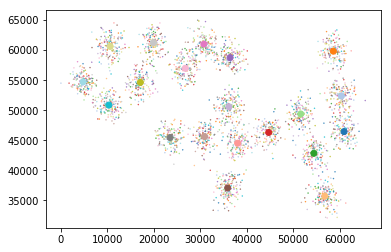

In [47]:
plt.scatter(data[:,0], data[:,1], marker='.', c=gt, s=0.7, cmap='tab20')
plt.scatter(c[:,0], c[:,1], marker='o', c=range(c.shape[0]), cmap='tab20')
plt.show()

In [34]:
n = data.shape[0]
k = c.shape[0]
max_iter = 100

In [44]:
np.random.shuffle(data)

In [45]:
groups, cens, costs = kmeans_py(data, k, max_iter)

In [41]:
def plot_clusters(data, iter_num, group, centroid, ax):
    ax.scatter(data[:,0], data[:,1], marker='.', c=group, s=0.7, cmap='tab20')
    ax.scatter(centroid[:,0], centroid[:,1], marker='o', c=range(centroid.shape[0]), cmap='tab20')
    ax.set_title("iteration "+str(iter_num))

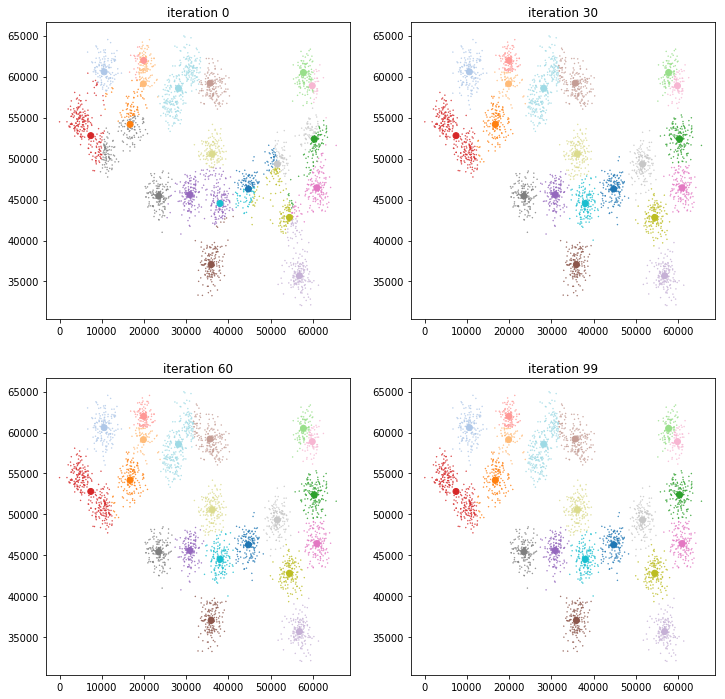

In [46]:
fig, axe = plt.subplots(2,2,figsize=(12,12))
need = [0, 30, 60, 99]
for i in range(max_iter):
    if i in need:
        idx = need.index(i)
        plot_clusters(data, i, groups[i], cens[i], axe[idx//2][idx%2])

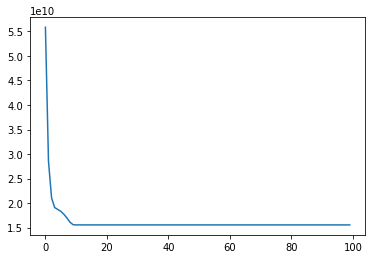

In [31]:
plt.plot(costs)
plt.show()